# Data Classes

this tutorial is from https://github.com/keithgalli/sklearn /////////   
  https://www.youtube.com/watch?v=M9Itm95JzL0&t=5415s&ab_channel=KeithGalli

In [79]:
from random import shuffle

class Sentiment:
    NEGATIVE = 'NEGATIVE'
    NEUTRAL = 'NEUTRAL'
    POSITIVE = 'POSITIVE' 

class Review:
    def __init__(self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
    def get_sentiment(self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else: #Score of 4 or 5
            return Sentiment.POSITIVE

class ReviewContainer:
    def __init__(self, reviews):
        self.reviews = reviews
        
    def get_text(self):
        return [x.text for x in self.reviews]
    
    def get_sentiment(self):
        return [x.sentiment for x in self.reviews]
    
    def evenly_distribute(self):
        negative = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews))
        positive = list(filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews))
        # positive_shrunk is = to the length of negatives
        positive_shrunk = positive[:len(negative)]
        self.reviews = negative + positive_shrunk # final reviews
        shuffle(self.reviews)
        
        
        print(negative[0].text)
        print(len(negative))
        print(len(positive))        
        

# Load Data

In [80]:
import pandas as pd 



file_name = pd.read_csv('/Users/sobhione/Documents/JENSENS-SCHOOL/ML-Supervised-Learning/ML-Supervised-learning-2/Positive_negative/IMDB Dataset.csv')
# add a new column called sentiment_value
file_name['sentiment_value'] = file_name['sentiment'].map({'positive': 1, 'negative': 0})
file_name


reviews = []

for i in range(0,5000):
    reviews.append(Review(file_name['review'][i], file_name['sentiment_value'][i]))
    


print(reviews[0].text)
print(reviews[0].sentiment)


One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

In [81]:
# print column name
#print(file_name.columns)

# Print column sentiment
#print(file_name['sentiment'])

# add a new column called sentiment_value
file_name['sentiment_value'] = file_name['sentiment'].map({'positive': 1, 'negative': 0})

# print the first 5 rows
file_name






,review,sentiment,sentiment_value
0,One of the other reviewers has mentioned that ...,positive,1
1,A wonderful little production. <br /><br />The...,positive,1
2,I thought this was a wonderful way to spend ti...,positive,1
3,Basically there's a family where a little boy ...,negative,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1
...,...,...,...
49995,I thought this movie did a down right good job...,positive,1
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,0
49997,I am a Catholic taught in parochial elementary...,negative,0
49998,I'm going to have to disagree with the previou...,negative,0


In [82]:
# print all sentiment_value with the value of 1
print(file_name[file_name['sentiment_value']==1]['sentiment_value'].count())
# print all sentiment_value with the value of 0
print(file_name[file_name['sentiment_value']==0]['sentiment_value'].count())

25000
25000


# Prep Data

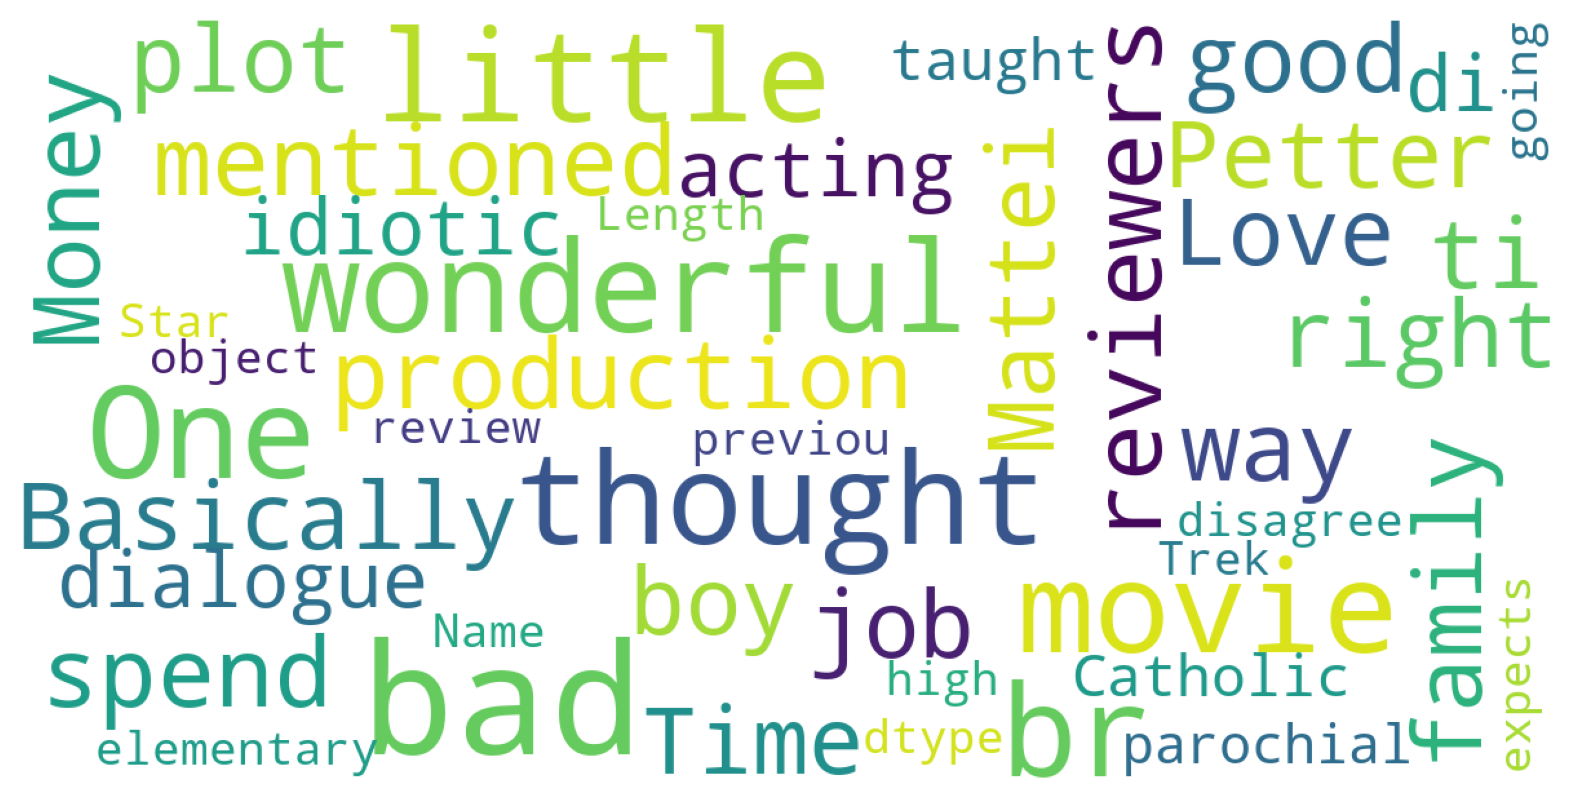

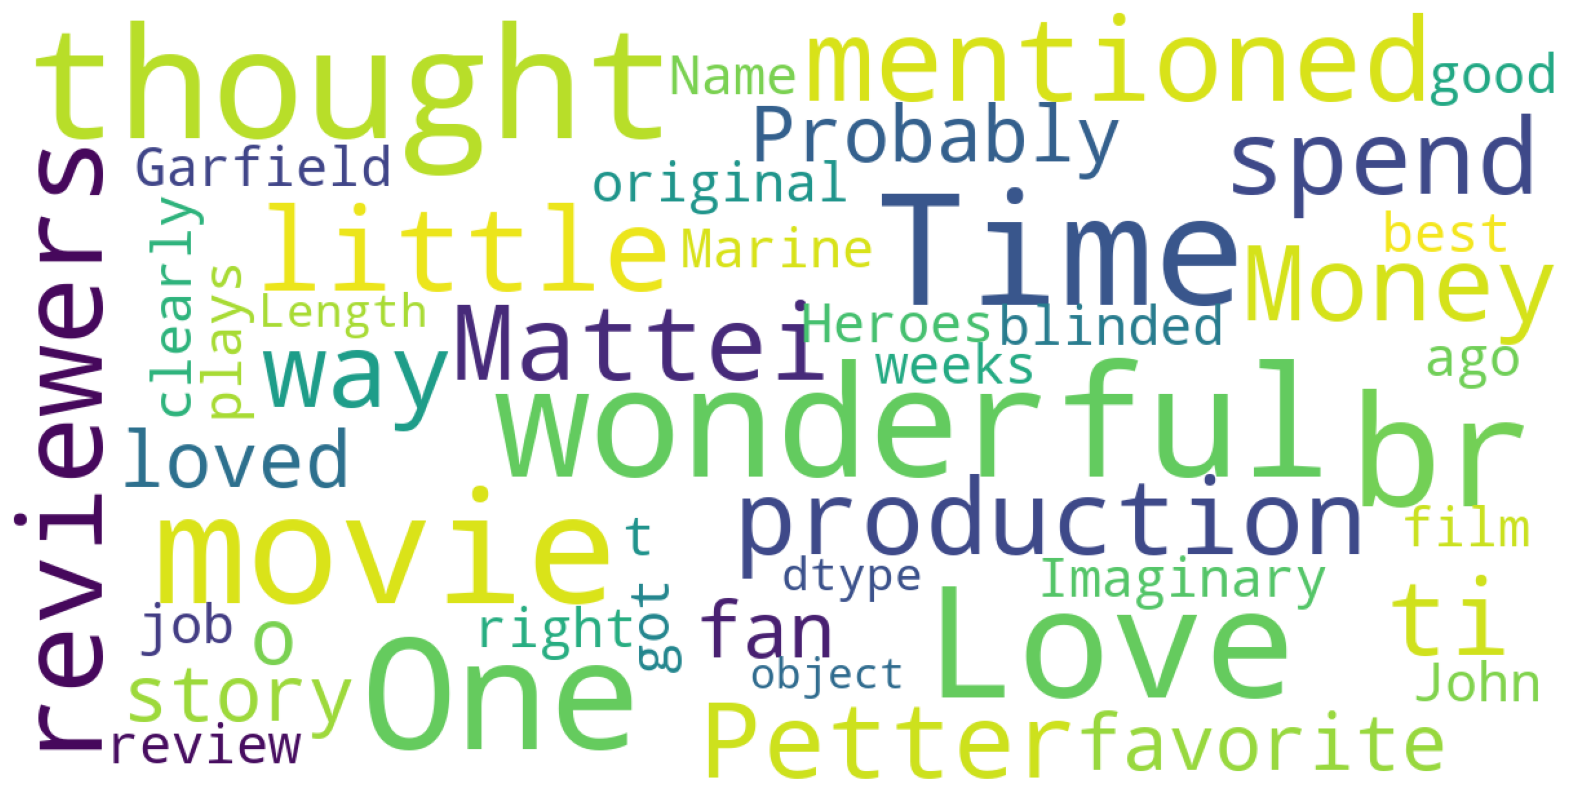

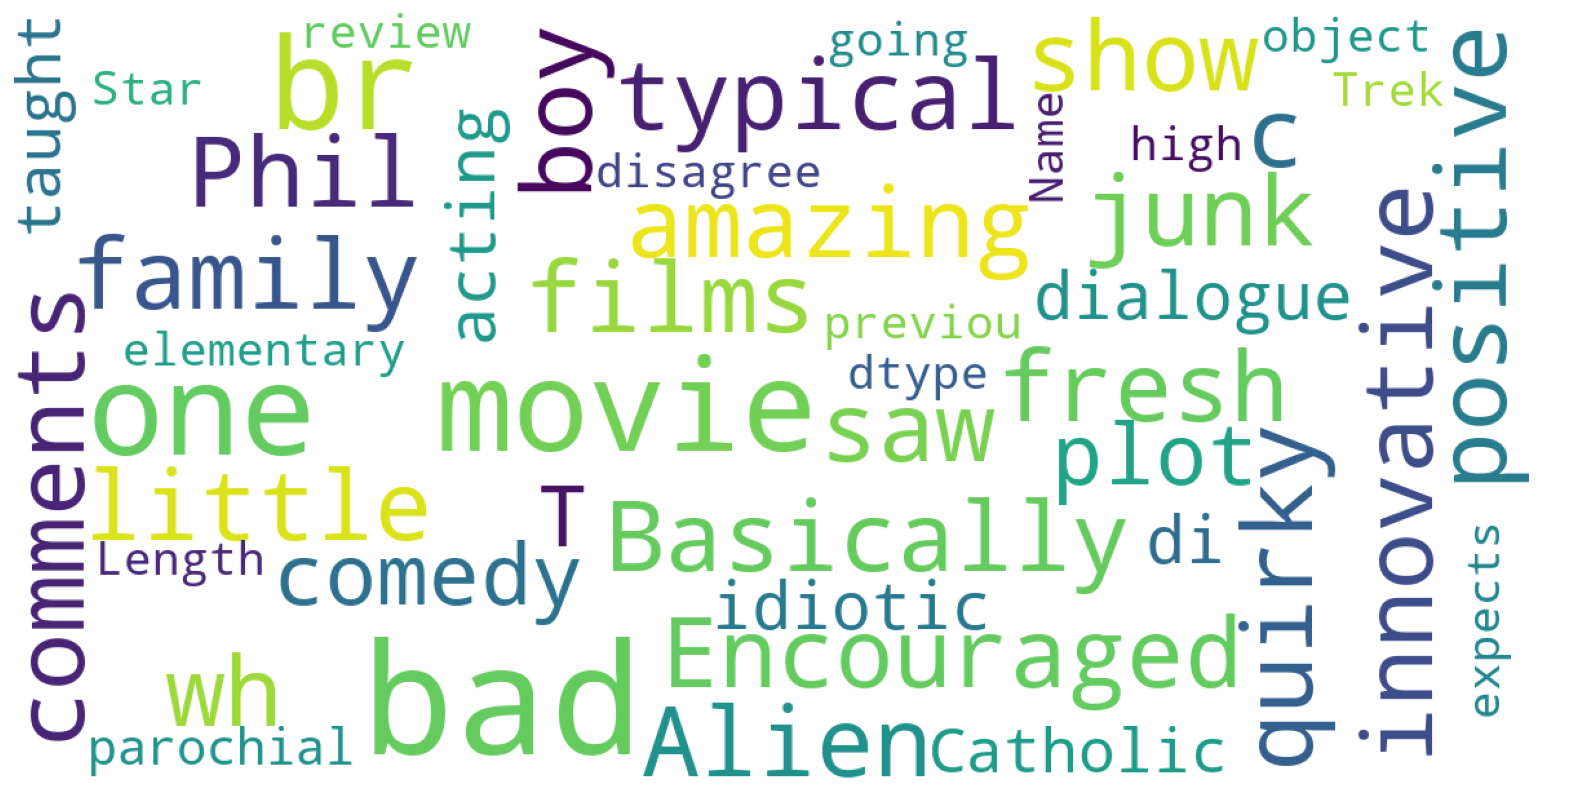

In [83]:
# Generate Python word cloud
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        stopwords = stopwords,
        max_words = 200,
        max_font_size = 40,
        scale = 3,
        random_state = 1
    ).generate(str(data))
    
    fig = plt.figure(1, figsize = (20,20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
        
    plt.imshow(wordcloud)
    plt.show()
    
# print word cloud
show_wordcloud(file_name['review'])

# print word cloud with positive sentiment
show_wordcloud(file_name[file_name['sentiment_value']==1]['review'])

# print word cloud with negative sentiment
show_wordcloud(file_name[file_name['sentiment_value']==0]['review'])


In [99]:
from sklearn.model_selection import train_test_split

test_size = 0.33

training, test = train_test_split(reviews, test_size=test_size, random_state=42)
print('Dataset length: ' ,len(file_name))
print('Training model len: ' ,len(training))
print('Testing model len: ' ,len(test))

train_container = ReviewContainer(training)
test_container = ReviewContainer(test)




Dataset length:  50000
Training model len:  3350
Testing model len:  1650


In [110]:
# Distribute positives and negataives evenly
train_container.evenly_distribute()
len(train_container.reviews)


train_x = train_container.get_text()
train_y = train_container.get_sentiment()

test_container.evenly_distribute()
test_x = test_container.get_text()
test_y = test_container.get_sentiment()

print(train_y.count(Sentiment.POSITIVE))

print(train_y.count(Sentiment.NEGATIVE))


One the whole, this movie isn't perfect. It doesn't 'hang well' together as the story line is basically a bunch of hooks to hang jokes.<br /><br />Some of these jokes are a little 'too 80s' and tend to date the picture.<br /><br />But some of these jokes are classic.<br /><br />You know a movie has something special when you and your friends still reference silly quotes from it over 2 decades later.<br /><br />Plus, there are a bunch of familiar faces; Michael Keaton, Danny Devito, Joe Piscapo, Peter Boyle, Marilu Henner, Maureen Stapleton, Bob Eubanks, Griffin Dunne, and one of the last roles of Alan Hale Jr., the Skipper from Gilligan's Island.<br /><br />Also, there are some great absurdist moments, like when Johnny is labelling the puppies with a pricing gun, or the Pope making an appearance in Johnny's neighborhood. Also, the scene where the fake priest makes up a lot of words in Latin is excellent. ("Summa cum laude, magna cum laude, the radio's too louda... Post meridian, ante m

Bad of words vectorization


In [86]:

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


vectorizer = TfidfVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)

test_x_vectors = vectorizer.transform(test_x)

print(train_x[0])
print(train_x_vectors[0].toarray())

#train_x_vectors
#train_y

you can be fooled by your first impressions. as in, initial reactions to a movie, for example. as in, the first time i saw this movie i was bedazzled by the idea of it (first of all, i love black comedies). could even - despite being male, myself - empathise with the feisty girls' fervor to see their husbands deceased without delay. was tripped up by my own face-value (and, i do mean "face-value") response to nicolette sheridan and a couple of the other delicious dames in the picture. it just goes to show you that you've gotta step back from a situation sometimes and see that it's bad (and not "bad good," either): the reason i'm giving this movie a "4" rating is because of ms sheridan and her gams (the rest of 'er is pretty good, too); but this movie has all the hallmark TV movie characteristics - which means you'll be disappointed if your a lover of movies made for the big screen. the story contains plot holes you could run a tunnel through - and i'll generally overlook holes in a plo

# Classification


### Linear SVM

In [87]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear')

clf_svm.fit(train_x_vectors, train_y)

#print(test_x[0])
clf_svm.predict(test_x_vectors[0])




ValueError: The number of classes has to be greater than one; got 1 class

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
 
# fit 
clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)

clf_dec.predict(test_x_vectors[0])

# Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

    #Fit
clf_gnb = GaussianNB()
clf_gnb.fit(train_x_vectors.toarray(), train_y)
#predict 
clf_gnb.predict(test_x_vectors[0].toarray())




# Logistic Regression (classifier)

In [111]:
from sklearn.linear_model import LogisticRegression
#Fit
clf_log = LogisticRegression()
clf_log.fit(train_x_vectors, train_y)
#predict
clf_log.predict(test_x_vectors[0])


ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 'NEGATIVE'

# Evaluation

In [ ]:
# Mean Accuracy
#print(clf_svm.score(test_x_vectors, test_y))
#print(clf_dec.score(test_x_vectors, test_y))
print(clf_gnb.score(test_x_vectors.toarray(), test_y))
print(clf_log.score(test_x_vectors, test_y))

# F1 scores

In [ ]:
# F1 scores
from sklearn.metrics import f1_score


#print('SVM',f1_score(test_y, clf_svm.predict(test_x_vectors), average=None,
 #        labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE]))
print('Decision Tree: ',f1_score(test_y, clf_dec.predict(test_x_vectors), average=None,
         labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE]))
print('Naive Bayes: ',f1_score(test_y, clf_gnb.predict(test_x_vectors.toarray()), average=None,
         labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE]))
print('Logistic Regression: ',f1_score(test_y, clf_log.predict(test_x_vectors), average=None,
         labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE]))


Models Count

In [ ]:
print('Train =  ')
print('POSITIVE:',train_y.count(Sentiment.POSITIVE))
print('NEGATIVE:',train_y.count(Sentiment.NEGATIVE))
print('NEUTRAL: ',train_y.count(Sentiment.NEUTRAL))

print('Test = ')
print('POSITIVE:',test_y.count(Sentiment.POSITIVE))
print('NEGATIVE:',test_y.count(Sentiment.NEGATIVE))
print('NEUTRAL: ',test_y.count(Sentiment.NEUTRAL))


# Quantitative Analyses
The given code is performing text classification using two classifiers : Support Vector Machine (SVM) and Naive Bayes.

In [ ]:
# quantitative Analyses
test_set = ['I thoroughly enjoyed this, 5 stars', 'bad book do not buy', 'horrible waste of time']
new_test = vectorizer.transform(test_set)

print(clf_svm.predict(new_test)) # SVM classifier
print(clf_gnb.predict(new_test.toarray())) # Naive Bayes classifier

Tuning our model ( with grid Search)

In [ ]:
from sklearn.model_selection import GridSearchCV

parameters = {'kernel': ('linear', 'rbf'), 'C': (1,4,8,16,32)}

svc = svm.SVC()

clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(train_x_vectors, train_y)

In [ ]:
print(clf_svm.score(test_x_vectors, test_y))


# Saving Model

Save Model

In [ ]:
import pickle

#with open('/Users/sobhione/Documents/JENSENS-SCHOOL/ML-Supervised-Learning/Positive_negative/models/sentiment_classifier.pkl', 'wb') as f :
 #   pickle.dump(clf, f)

Load Model

In [ ]:

#with open('/Users/sobhione/Documents/JENSENS-SCHOOL/ML-Supervised-Learning/Positive_negative/models/sentiment_classifier.pkl', 'rb') as f :
#    loaded_clf = pickle.load(f)

In [ ]:
print(test_x[0])
loaded_clf.predict(test_x_vectors[0])